<font size = "5">**Predicting Heart Disease: Classification Using Clinical and Demographic Data in Switzerland** </font> 

### Introduction

Within the given datasets, there is information on heart disease in the population of a select few locations worldwide. As heart disease is a leading cause of death, this data is focused on the factors that might predict the presence of heart disease in an individual. By using this data in a predictive model, we can assess the data and predict a diagnosis. This is useful for identifying individuals at risk of coronary artery disease (CAD) before complications arise. 

**Predictive Question:**
Can we accurately predict the presence of heart disease in patients based on their age, sex, chest pain type, and resting blood pressure?

**Dataset Description:**
The dataset I'll be using is from a study that examines a new discriminant function model that is used for estimating the probabilities of angiographic coronary disease. The original study involved 303 patients from the Cleveland Clinic in Ohio; the model was then tested on three  patient groups from around the world:
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from University Hospitals in Zurich and Basel, Switzerland 

For this project, I will focus on the Swiss dataset, which includes 14 attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, the number of major vessels colored by fluoroscopy, thalassemia status, and the diagnosis of heart disease. In particular, I am interested in age, sex, chest pain type, and resting blood pressure.

### Preliminary exploratory data analysis:

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
project_data <- read_csv("data/heart_disease/processed.switzerland.data", col_names = c("age",
               "sex", 
               "cp", # Chest Pain
               "trestbps", #Resting BP (in mm Hg)
               "chol", #Cholestoral (in mg/dl)
               "fbs", #Fasting Blood Sugar > 120 mg/dl"
               "restecg", #Resting ECG Results"
               "thalach", #Maximum HR Achieved
               "exang", #Exercise Induced Angina
              "oldpeak", #ST depression induced by exercise relative to rest
              "slope", #the slope of the peak exercise ST segment - Value 1: upsloping - Value 2: flat - Value 3: downsloping
              "ca", #number of major vessels (0-3) colored by flourosopy
              "thal", #thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
              "num"), #num: diagnosis of heart disease (angiographic disease status) 
                     #-Value 0: < 50% diameter narrowing -Value 1: > 50% diameter narrowing (predicted attribute)
               na = "?")
project_data

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,NA,2,114,0,1.6,2,2,NA,0
73,0,3,160,0,0,1,121,0,0.0,1,NA,3,1
74,1,2,145,0,NA,1,123,0,1.3,1,NA,NA,1


In [7]:
selected_project_data <- project_data |>
    select(age, sex, cp, trestbps)
selected_project_data

# Summarize the number of observations in each class
class_counts <- selected_project_data |>
  count(cp)

# Calculate the means of the predictor variables
predictor_means <- selected_project_data |>
  summarise_all(mean, na.rm = TRUE)

# Create a summary table
summary_table <- data_frame(
  predictor_variable = c("Sex", "Age", "Chest Pain", "Resting BP"),
  mean_value = unlist(predictor_means))

# Print the summary table
print(summary_table)

age,sex,cp,trestbps
<dbl>,<dbl>,<dbl>,<dbl>
32,1,1,95
34,1,4,115
35,1,4,NA
⋮,⋮,⋮,⋮
72,1,3,160
73,0,3,160
74,1,2,145


Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
ℹ Please use `tibble()` instead.”


# A tibble: 4 × 2
  predictor_variable mean_value
  <chr>                   <dbl>
1 Sex                    55.3  
2 Age                     0.919
3 Chest Pain              3.70 
4 Resting BP            130.   


The above data

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


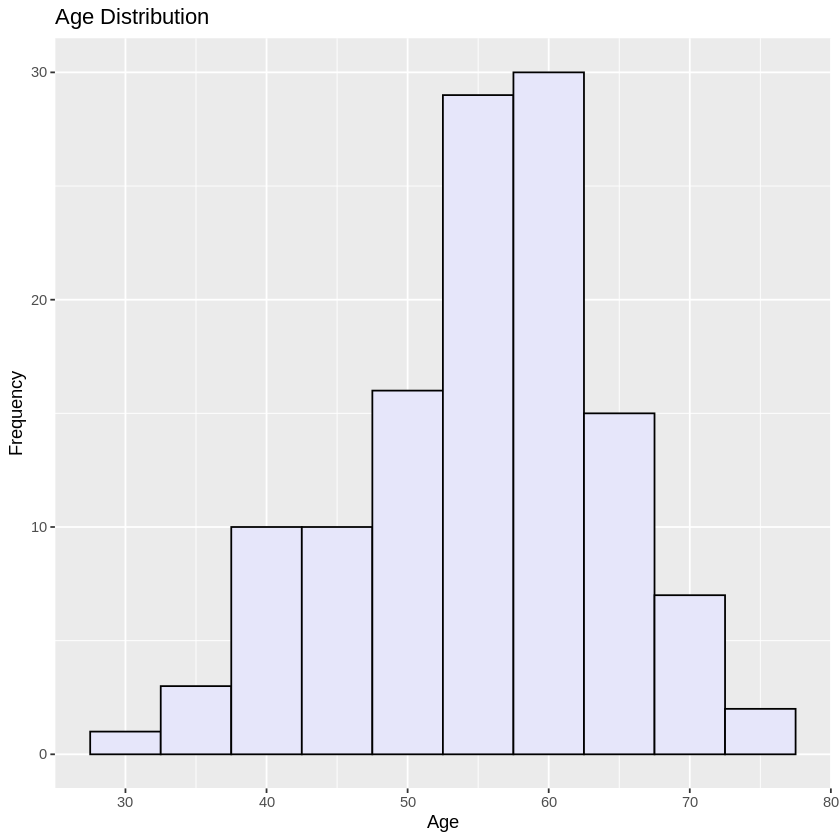

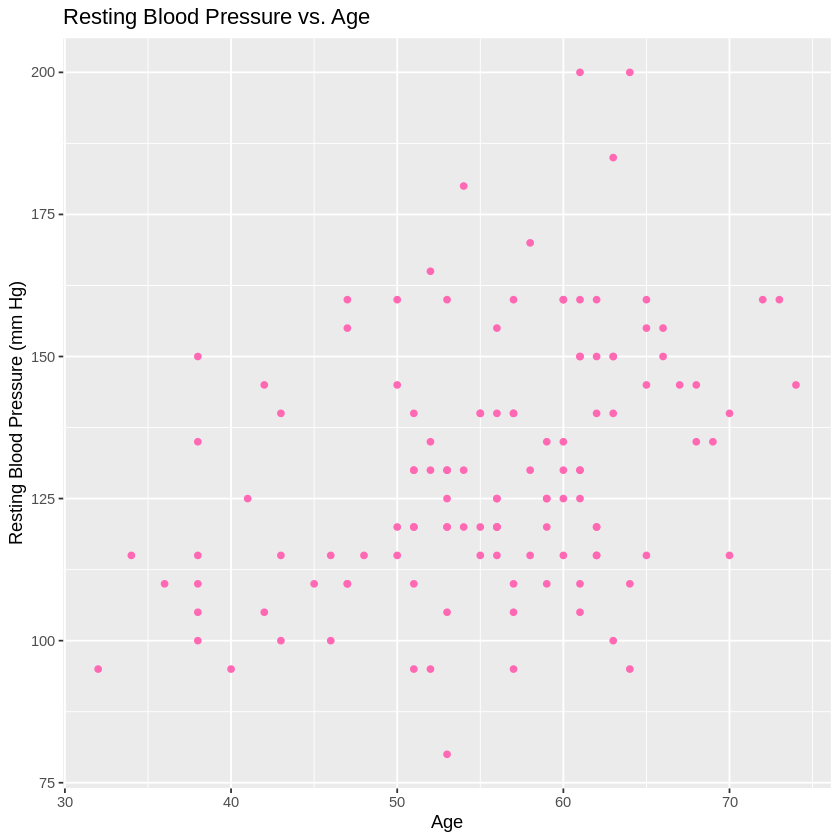

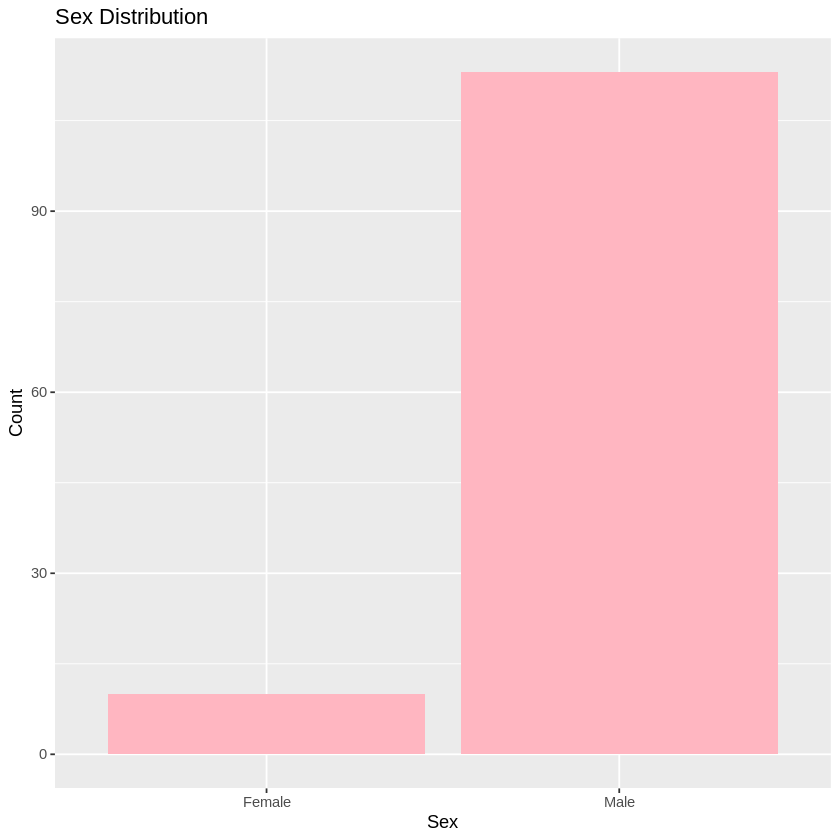

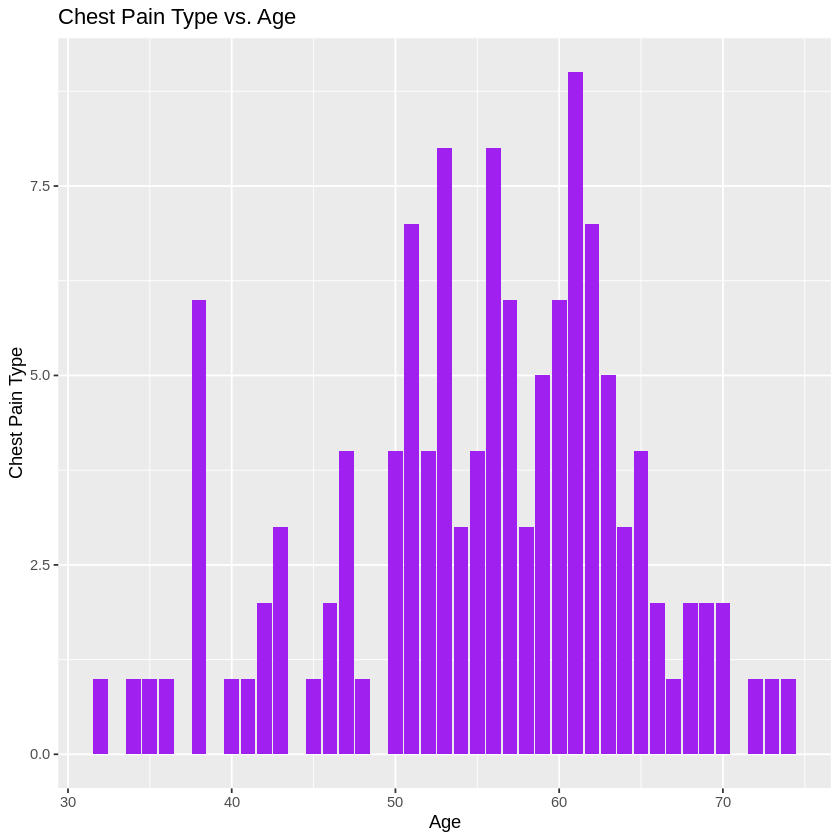

In [52]:
library(tidyverse)
library(readr)
library(dplyr)
library(RColorBrewer)

# This is a histogram plot for age distribution
age_plot <- ggplot(selected_project_data, aes(x = age)) +
          geom_histogram(binwidth = 5, fill = "lavender", color = "black") +
          labs(title = "Age Distribution", x = "Age", y = "Frequency")
age_plot


# This is a scatterplot for resting blood pressure compared to age
bp_age_plot <- ggplot(selected_project_data, aes(x = age, y = trestbps)) +
          geom_point(color = "hotpink") +
          labs(title = "Resting Blood Pressure vs. Age", 
               x = "Age", 
               y = "Resting Blood Pressure (mm Hg)")
bp_age_plot


# This is a bar plot for the distribution of sex 
sex_plot <- ggplot(selected_project_data, aes(x = as_factor(sex))) +
          geom_bar(fill = "lightpink") +
          labs(title = "Sex Distribution", x = "Sex", y = "Count") +
          scale_x_discrete(labels = c("0" = "Female", "1" = "Male"))
sex_plot


# This is a bar plot for chest pain type compared to age
cp_age_plot <- ggplot(selected_project_data, aes(x = age)) +
          geom_bar(fill = "purple") +
          labs(title = "Chest Pain Type vs. Age", 
               x = "Age", 
               y = "Chest Pain Type")
cp_age_plot


### Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results
Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?Within the given datasets, there is information on heart disease in the population of a select few locations worldwide. As heart disease is a leading cause of death, this data is focused on the factors that might predict the presence of heart disease in an individual. By using this data in a predictive model, we can assess the data and predict a diagnosis. This is useful for identifying individuals at risk of coronary artery disease (CAD) before complications arise. 

**Data Analysis:**
- Using Age, Sex, Chest Pain Type, and Resting Blood Pressure
**Dataset Description:**
The dataset I'll be using is from a study that examines a new discriminant function model that is used for estimating the probabilities of angiographic coronary disease. The original study involved 303 patients from the Cleveland Clinic in Ohio; the model was then tested on three  patient groups from around the world:
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from University Hospitals in Zurich and Basel, Switzerland 

